4e-05
0.03877570841430546


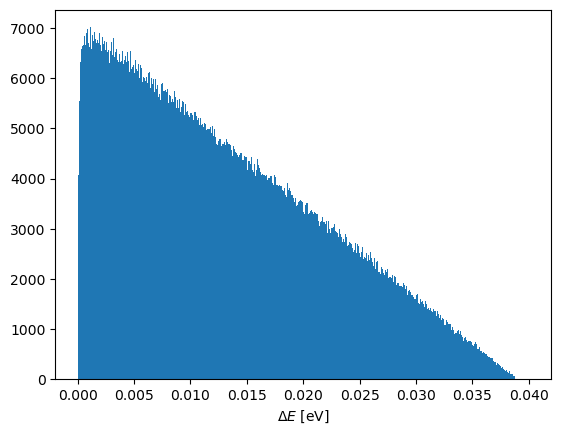

In [2]:
from os import path
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

datadir = path.expanduser('~/Desktop/simulation_outputs/percolation/40x40/')
energy_dir = datadir + 'eARPACK/'
mo_dir = 'MOs_ARPACK'
pos_dir = 'structures'

efiles = glob(energy_dir + '*')

bins = np.linspace(0,0.04,1001)
hist = np.zeros(1000,dtype=float)
max_dE = 0

for ef in efiles:
    energies = np.load(ef)
    dE = np.abs(energies[:,None] - energies[None,:])
    MdE = np.max(dE)
    if MdE > max_dE: max_dE = MdE
    temp_hist, _ = np.histogram(dE[dE > 0], bins)
    hist += temp_hist
    

centers  = (bins[1:] + bins[:-1]) / 2
dx = bins[1] - bins[0]
print(dx)
print(max_dE)


plt.bar(centers, hist, align='center', width=dx)
plt.xlabel('$\Delta E$ [eV]')
plt.show()


